# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('/Users/dehilinesma/Downloads/boston_data.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [2]:
# Your plots here
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


<Figure size 720x432 with 0 Axes>

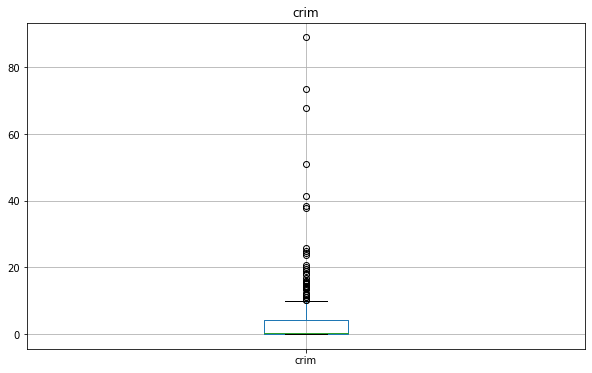

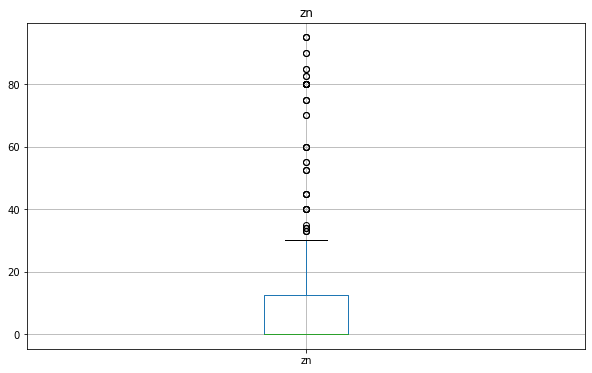

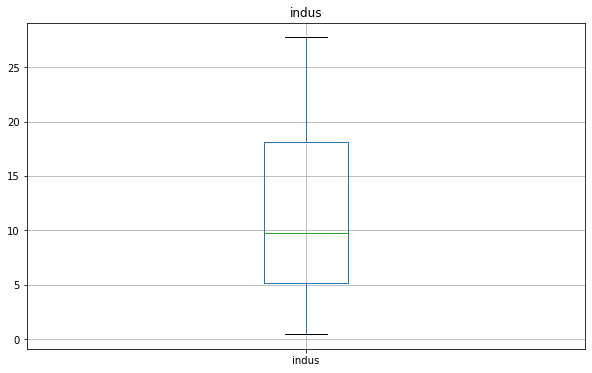

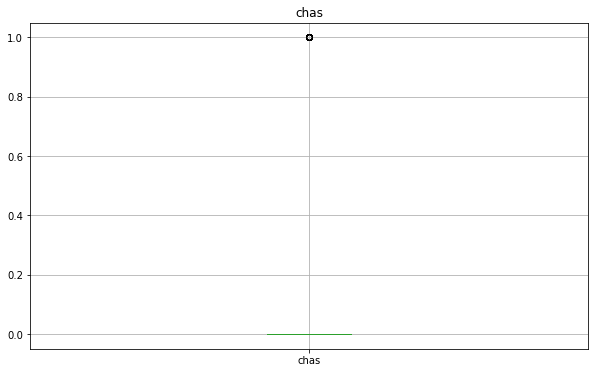

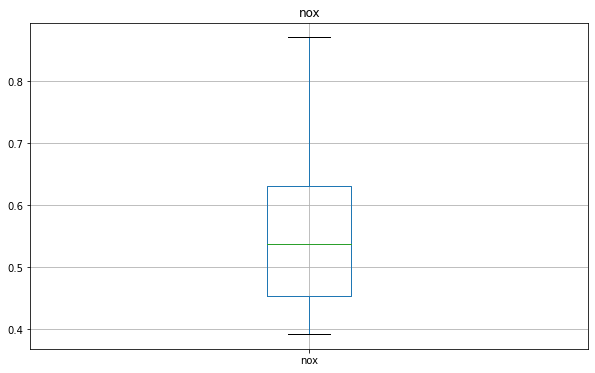

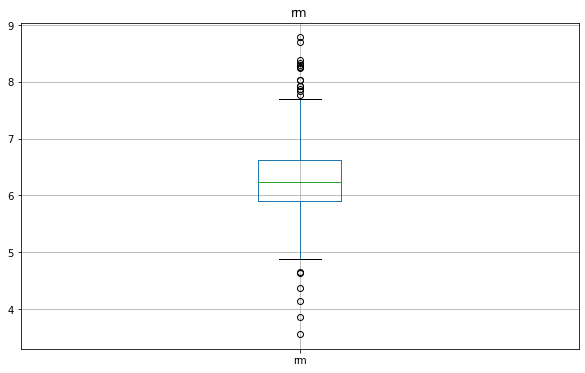

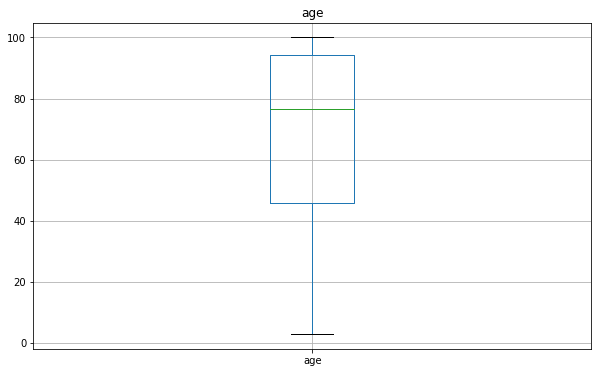

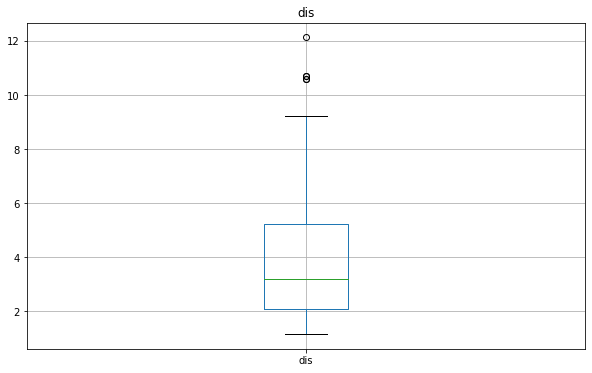

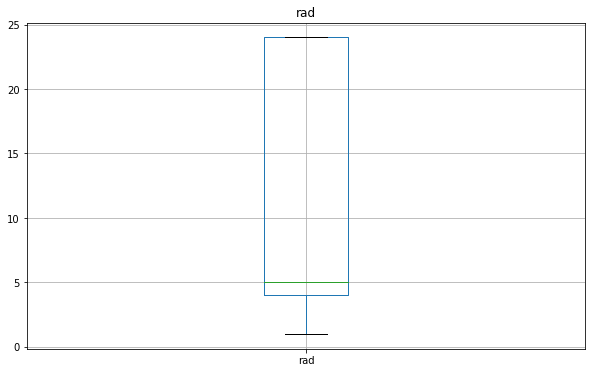

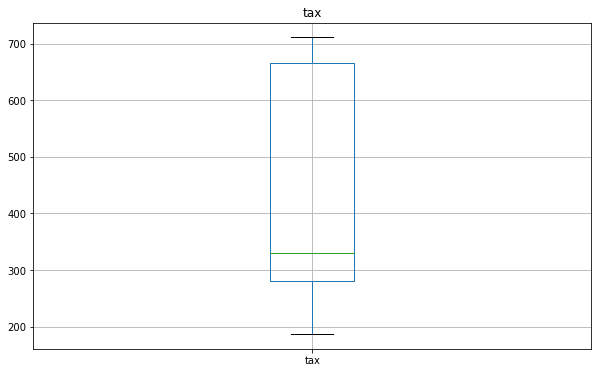

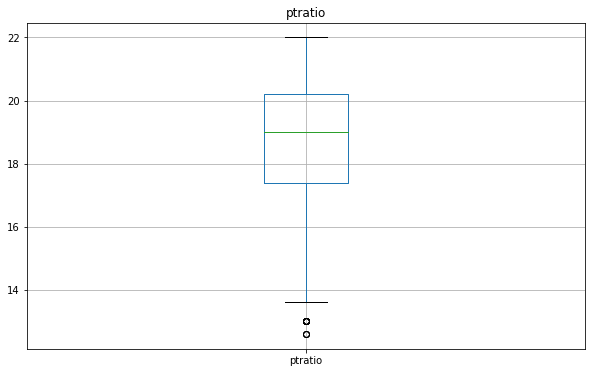

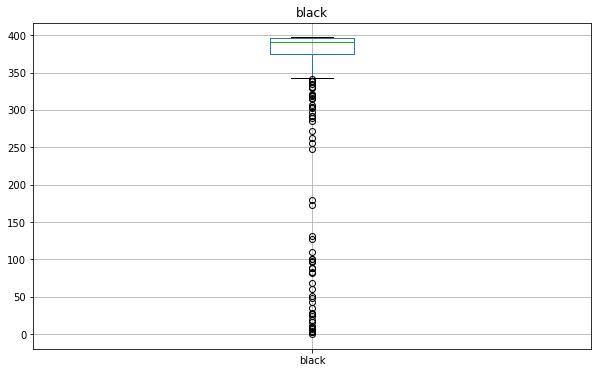

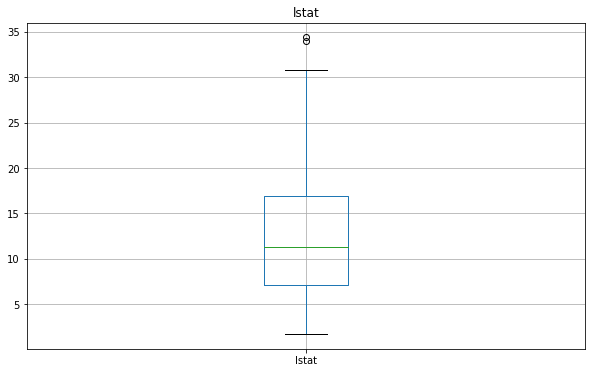

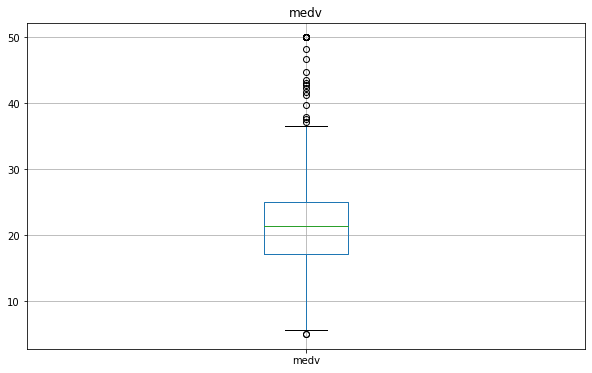

In [3]:
#Check Outliers
num_df = data.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [4]:
data = data.drop(data[data['crim'] >40].index)
data = data.drop(data[data['zn'] > 40].index)
data = data.drop(data[data['chas'] >0.1].index)
data = data.drop(data[data['dis'] > 12].index)
data = data.drop(data[data['black'] < 200].index)

In [5]:
data.shape

(304, 14)

In [7]:
data['chas'].value_counts()

0.0    304
Name: chas, dtype: int64

In [8]:
data=data.drop(columns= ['chas'])

### Your response here

source: https://www.kaggle.com/c/boston-housing

The first graph represents the relation between lower status of the population (percent) and the value of the house. As expected, as the lower status of the population increases, the value of the houses decrease.

The second graph represents the relation between the number of rooms per dwelling and the value of the house. As the number of rooms increase, the value on the house also increases.

The last graph represents the relation between pupil-teacher ratio by town. I was expecting that the lower the pupil-teach ratio the lower the value of the houses in the region. The linear regression, actually shows the opposite. The bigger the ptratio, the lower the house values are.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

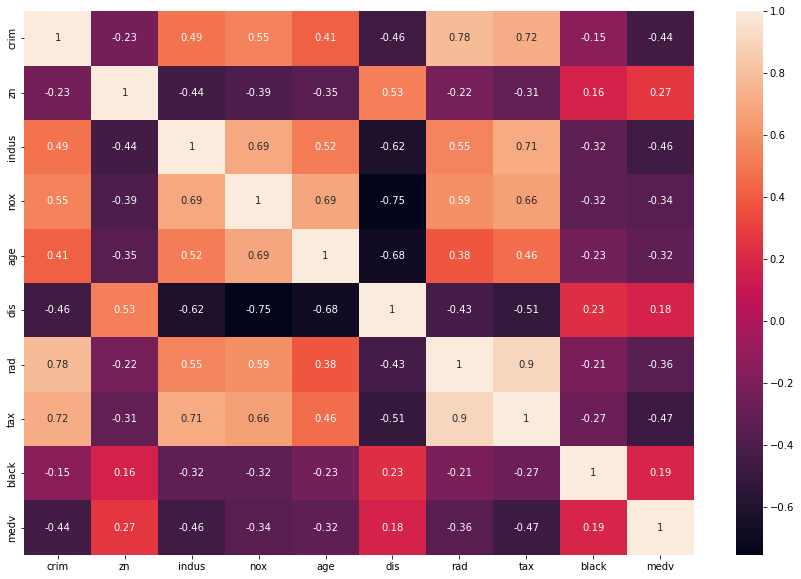

In [9]:
# Your response here
f, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
sns.heatmap(data[['crim','zn','indus','nox','age','dis','rad','tax','black','medv']].corr(),annot=True)

#### Significant correlations

* nox - indus
* indus - tax
* age - tax
* tax - rad
* zn - dis

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [10]:
# Your code here
data.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,2.567715,4.847039,11.219375,0.554542,6.254868,69.886842,3.683134,9.078947,395.384868,18.584539,381.936118,12.539770,22.261513
std,5.050181,10.058843,6.630813,0.106295,0.653054,27.074056,1.842694,8.364254,166.708555,2.049807,26.181768,6.502274,8.119190
min,0.006320,0.000000,1.250000,0.409000,3.561000,2.900000,1.169100,1.000000,188.000000,13.000000,248.310000,1.730000,5.000000
25%,0.092625,0.000000,5.860000,0.467750,5.879750,50.725000,2.181375,4.000000,279.000000,17.800000,379.627500,7.537500,18.100000
50%,0.243125,0.000000,9.125000,0.538000,6.202000,76.600000,3.239250,5.000000,307.000000,19.100000,392.655000,11.265000,21.200000
75%,2.360625,0.000000,18.100000,0.614000,6.538500,94.525000,4.812200,8.000000,437.000000,20.200000,396.900000,16.312500,24.525000
max,38.351800,40.000000,27.740000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [11]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [12]:
data.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [16]:
# Your code here
from sklearn.model_selection import train_test_split

X=data[['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y=data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [17]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
train=[]
test=[]
for i in range(1,30,2):
    regr = RandomForestRegressor(max_depth=i)
    regr.fit(X_train, y_train)
    train.append(regr.score(X_train,y_train))
    test.append(regr.score(X_test,y_test))

Now, plot the score for each tree on the training set and on the testing set.

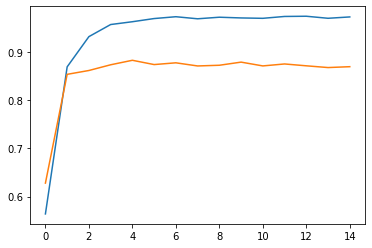

In [19]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(train)
plt.plot(test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

#### Your response here

As the depth increases, the score of the model increases. However, when the model is trained with the maximum depth of 6 or higher, the score stabilizes.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
### Your response here

##When the model is trained with a maximum depth of 1, the model suffers from high bias.
##When the model is trained with a maximum depth of 10, the model suffers with low bias and high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [20]:
regr = RandomForestRegressor(max_depth=6)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6)

In [21]:
regr.score(X_test,y_test)

0.8746666445720119

In [22]:
from sklearn.metrics import mean_absolute_error
y_pred=regr.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.1613898040382162

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

8.340456846110055

In [24]:
## Your response here
##87% at depth 6 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*